# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import matplotlib
%matplotlib inline

from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [3]:
from trainer import Trainer
from tracker import TrackerFactory
from agent import AgentFactory

agent_factory = AgentFactory()
tracker_factory = TrackerFactory()

trainer = Trainer(env, agent_factory, tracker_factory)
trainer.describe_environment()


Seed:  1
Brain names:  ['ReacherBrain']
{'ReacherBrain': <unityagents.brain.BrainParameters object at 0x7fa64ffd97f0>}
Number of agents: 1
Size of each action: 4
Type of action space: continuous
There are 1 agents. Each observes a state with length: 33 and takes an action of size 4
Type of state space: continuous
State vector type:  (33,)
The state for the first agent looks like:
 [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


Agent is using:  cuda:0


/home/safdar/anaconda3/envs/drl/lib/python3.6/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


0 0
Episode :: 0	Scores:	Centennial: 0.000	Mean: 0.000	Min: 0.000	Max:0.000	Duration: 1.25s


/data/code/nd/deep-learning/reinforced/DRL-Continuous-Control/agent.py:146: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


1 1
Episode :: 1	Scores:	Centennial: 0.000	Mean: 0.000	Min: 0.000	Max:0.000	Duration: 6.90s
2 2
Episode :: 2	Scores:	Centennial: 0.547	Mean: 1.640	Min: 1.640	Max:1.640	Duration: 7.00s
3 3
Episode :: 3	Scores:	Centennial: 0.467	Mean: 0.230	Min: 0.230	Max:0.230	Duration: 7.07s
4 4
Episode :: 4	Scores:	Centennial: 0.592	Mean: 1.090	Min: 1.090	Max:1.090	Duration: 7.27s
5 5
Episode :: 5	Scores:	Centennial: 0.588	Mean: 0.570	Min: 0.570	Max:0.570	Duration: 7.31s
Xs:  (6,) 	Ys:  (6,)
Xs:  (6,) 	Ys:  (6,)
Xs:  (6,) 	Ys:  (6,)
Xs:  (6,) 	Ys:  (6,)


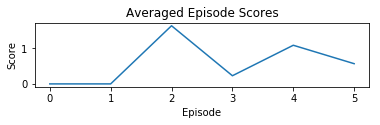

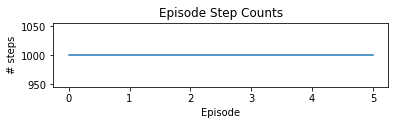

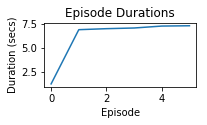

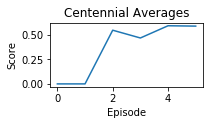

6 6
Episode :: 6	Scores:	Centennial: 0.603	Mean: 0.690	Min: 0.690	Max:0.690	Duration: 7.50s
7 7
Episode :: 7	Scores:	Centennial: 0.661	Mean: 1.070	Min: 1.070	Max:1.070	Duration: 7.32s
8 8
Episode :: 8	Scores:	Centennial: 0.698	Mean: 0.990	Min: 0.990	Max:0.990	Duration: 7.51s
9 9
Episode :: 9	Scores:	Centennial: 0.661	Mean: 0.330	Min: 0.330	Max:0.330	Duration: 7.35s
10 10
Episode :: 10	Scores:	Centennial: 0.759	Mean: 1.740	Min: 1.740	Max:1.740	Duration: 7.56s
Xs:  (11,) 	Ys:  (11,)
Xs:  (11,) 	Ys:  (11,)
Xs:  (11,) 	Ys:  (11,)
Xs:  (11,) 	Ys:  (11,)


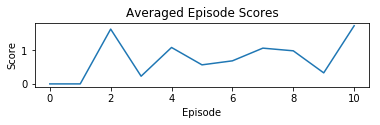

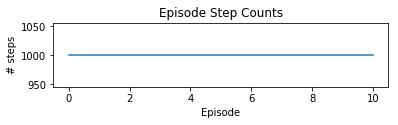

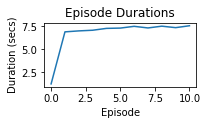

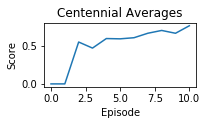

11 11
Episode :: 11	Scores:	Centennial: 0.765	Mean: 0.830	Min: 0.830	Max:0.830	Duration: 7.45s
12 12
Episode :: 12	Scores:	Centennial: 0.759	Mean: 0.690	Min: 0.690	Max:0.690	Duration: 7.68s
13 13
Episode :: 13	Scores:	Centennial: 0.736	Mean: 0.430	Min: 0.430	Max:0.430	Duration: 7.62s
14 14
Episode :: 14	Scores:	Centennial: 0.709	Mean: 0.340	Min: 0.340	Max:0.340	Duration: 7.70s
15 15
Episode :: 15	Scores:	Centennial: 0.749	Mean: 1.340	Min: 1.340	Max:1.340	Duration: 7.65s
Xs:  (16,) 	Ys:  (16,)
Xs:  (16,) 	Ys:  (16,)
Xs:  (16,) 	Ys:  (16,)
Xs:  (16,) 	Ys:  (16,)


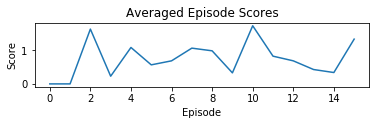

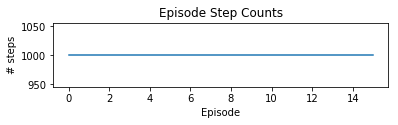

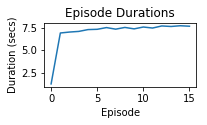

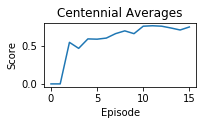

16 16
Episode :: 16	Scores:	Centennial: 0.765	Mean: 1.020	Min: 1.020	Max:1.020	Duration: 7.53s


In [ ]:
tracker = trainer.train_single(n_episodes=1000, plot_every=5, learn_every=20, iterations_per_learn=10)


In [ ]:
tracker.plot_performance()